## Data Screening by Spatial Analysis
### process
1. making distinct nation-wide station dataset -> geoDataFrame  
2. check the boundary (within our service area)
3. making buffer
4. Spatial Join : select features within buffer polygons

### used functions
* gis sql
    * ST_INTERSECTS
    * ST_X, ST_Y
    * ST_GEOGPOINT
    * ST_WITHIN
    * ST_CONTAINS ...
* geopandas
    * gpd.points_from_xy(long, lat)
    * gpd.GeoDataFrame(columns, geometry  = xx )
    * sjoin(GDF, GDF, how = , op = )
    * buffer
    * Proj
 * shapely
     * shapely.ops : unary_union, transform
     * shapely.geometry : Polygon, MultiPolygon, Point
 * pyproj

### buffer 설정시 meter 단위 맞추기 (units=meters)
* epsg:4326은 degree unit 좌표계
* 25m = 0.00025
* 50m = 0.0005
* 1° = 111 km (or 60 nautical miles) 0.1° = 11.1 km. 0.01° = 1.11 km (2 decimals, km accuracy) 0.001° =111 m

In [1]:
import pandas as pd
import geopandas as gpd
import pandas_gbq as pd_gbq

### station dataset 

In [4]:
pj = 'xxx'
sql = """
xxx
"""
geosql = """
xxx
"""

In [5]:
stations = pd_gbq.read_gbq(sql, project_id = pj)
stations_with_code = pd_gbq.read_gbq(geosql, project_id = pj)

Downloading: 100%|██████████| 4185/4185 [00:00<00:00, 4849.68rows/s]


In [6]:
stations.head()

,station_name,lat,long,point
0,건국동 광주은행 사거리,32.206516,126.858962,POINT(126.858962 32.206516)
1,송악산 인증센터,33.206723,126.287401,POINT(126.2874012 33.2067231)
2,법환포구 인증센터,33.235775,126.515158,POINT(126.5151584 33.2357749)
3,월드컵경기장 광장,33.246220,126.509278,POINT(126.5092776992 33.2462197433)
4,쇠소깍 인증센터,33.252206,126.623119,POINT(126.6231188 33.2522055)


In [5]:
#stations.long.min()

### to GeoDataFrame

In [7]:
geom_station = gpd.points_from_xy(stations.long, stations.lat)

In [8]:
gdf_station = gpd.GeoDataFrame( stations[['station_name','lat','long']],
    geometry = geom_station)
gdf_station.crs = {'init' : 'epsg:4326'}
gdf_station2 = gdf_station.to_crs(epsg=4326)
gdf_station2.head()

/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,station_name,lat,long,geometry
0,건국동 광주은행 사거리,32.206516,126.858962,POINT (126.85896 32.20652)
1,송악산 인증센터,33.206723,126.287401,POINT (126.28740 33.20672)
2,법환포구 인증센터,33.235775,126.515158,POINT (126.51516 33.23577)
3,월드컵경기장 광장,33.246220,126.509278,POINT (126.50928 33.24622)
4,쇠소깍 인증센터,33.252206,126.623119,POINT (126.62312 33.25221)


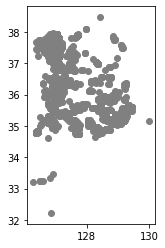

In [10]:
gdf_station2.plot(color='grey')

In [95]:
# buffer table 
buffer25_all_station = gdf_station2.copy()
buffer25_all_station['geometry'] = buffer25_all_station.geometry.buffer(0.00025)
buffer25_all_station.head()

,station_name,lat,long,geometry
0,건국동 광주은행 사거리,32.206516,126.858962,"POLYGON ((126.85921 32.20652, 126.85921 32.206..."
1,송악산 인증센터,33.206723,126.287401,"POLYGON ((126.28765 33.20672, 126.28765 33.206..."
2,법환포구 인증센터,33.235775,126.515158,"POLYGON ((126.51541 33.23577, 126.51541 33.235..."
3,월드컵경기장 광장,33.246220,126.509278,"POLYGON ((126.50953 33.24622, 126.50953 33.246..."
4,쇠소깍 인증센터,33.252206,126.623119,"POLYGON ((126.62337 33.25221, 126.62337 33.252..."


In [96]:
#buffer25_all_station.to_file("buffer25_all_stations.json", driver="GeoJSON")

## Stations Within Geoblock

In [154]:
geoblock_sql = """
xxx
"""
#gb = pd_gbq.read_gbq(geoblock_sql, project_id = pj)

In [13]:
gb.head()

,station_name,lat,long
0,가락마을602동앞,36.502350,127.239876
1,가재마을310동앞,36.505023,127.243896
2,도담고등학교,36.513549,127.264529
3,어진동제3주차장,36.502344,127.266050
4,다정교,36.494621,127.256346


In [145]:
gb2 = pd.merge(gb,stations_with_code)
gb2.head()

,station_name,lat,long,point,code
0,가락마을602동앞,36.502350,127.239876,POINT(127.239876 36.50235),세종
1,가재마을310동앞,36.505023,127.243896,POINT(127.243896 36.505023),세종
2,도담고등학교,36.513549,127.264529,POINT(127.264529 36.513549),세종
3,어진동제3주차장,36.502344,127.266050,POINT(127.26605 36.502344),세종
4,다정교,36.494621,127.256346,POINT(127.256346 36.494621),세종


In [65]:
buf_station = gpd.points_from_xy(gb2.long, gb2.lat)
dbuf_station = gpd.GeoDataFrame( gb2[['station_name','lat','long','code']],
    geometry = buf_station)
dbuf_station.crs = {'init' : 'epsg:4326'}
dbuf_station2 = dbuf_station.to_crs(epsg=4326)
dbuf_station2.head()

/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,station_name,lat,long,code,geometry
0,가락마을602동앞,36.502350,127.239876,세종,POINT (127.23988 36.50235)
1,가재마을310동앞,36.505023,127.243896,세종,POINT (127.24390 36.50502)
2,도담고등학교,36.513549,127.264529,세종,POINT (127.26453 36.51355)
3,어진동제3주차장,36.502344,127.266050,세종,POINT (127.26605 36.50234)
4,다정교,36.494621,127.256346,세종,POINT (127.25635 36.49462)


## Riding Log

In [155]:
riding = """
xxx
"""

In [156]:
#rdf = pd_gbq.read_gbq(riding, project_id = pj )

In [158]:
rdf.columns

Index(['id', 'region', 'long', 'lat', 'return_photo'], dtype='object')

In [159]:
riding_geo = gpd.points_from_xy(rdf.long, rdf.lat)
rdf_geo = gpd.GeoDataFrame(rdf[['id','region','lat','long','return_photo']],
                          geometry = riding_geo)
rdf_geo.crs = {'init':'epsg:4326'}
rdf_geo_ = rdf_geo.to_crs(epsg=4326)
rdf_geo_.columns

/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Index(['id', 'region', 'lat', 'long', 'return_photo', 'geometry'], dtype='object')

## station within geoblock buffer making

###  way 1  : no longer GeoDataFrame -> cannot do spatial join

In [160]:
from shapely.geometry import Point, MultiPolygon, Polygon
from shapely.ops import unary_union
import matplotlib.pyplot as plt
from descartes import PolygonPatch

In [61]:
polygons25 = [(dbuf_station2.iloc[i,4].buffer(0.00025)) for i in range(len(dbuf_station2))]
polygons50 = [(dbuf_station2.iloc[i,4].buffer(0.0005)) for i in range(len(dbuf_station2))]
# dbuf_station2['b25'] = polygons25
# dbuf_station2['b50'] = polygons50

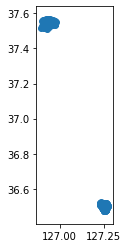

In [64]:
dbuf_station2.plot()

In [162]:
#dbuf_station2.iloc[0,4].contains(dbuf_station2.iloc[0,3])

In [31]:
# ax = plt.plot(figsize = ())
# gpd.GeoSeries([dbuf_station2.geometry.buffer(0.005).unary_union]).plot(ax=ax, color = 'k', edgecolor = 'w')
# ax.set_title('unary_union')
# ax.set_axis_off()
# plt.show()

### way 2 : GeoDataFrame type

In [71]:
# buffer 25m
buffer25 = dbuf_station2.copy()

In [72]:
buffer25['geometry'] = buffer25.geometry.buffer(0.00025)
buffer25.head()

,station_name,lat,long,code,geometry
0,가락마을602동앞,36.502350,127.239876,세종,"POLYGON ((127.24013 36.50235, 127.24012 36.502..."
1,가재마을310동앞,36.505023,127.243896,세종,"POLYGON ((127.24415 36.50502, 127.24414 36.505..."
2,도담고등학교,36.513549,127.264529,세종,"POLYGON ((127.26478 36.51355, 127.26478 36.513..."
3,어진동제3주차장,36.502344,127.266050,세종,"POLYGON ((127.26630 36.50234, 127.26630 36.502..."
4,다정교,36.494621,127.256346,세종,"POLYGON ((127.25660 36.49462, 127.25659 36.494..."


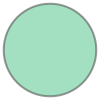

In [152]:
buffer25.geometry[0]

In [126]:
buffer40 = dbuf_station2.copy()

In [127]:
buffer40['geometry'] = buffer40.geometry.buffer(0.0004)
buffer40.head()

,station_name,lat,long,code,geometry
0,가락마을602동앞,36.502350,127.239876,세종,"POLYGON ((127.24028 36.50235, 127.24027 36.502..."
1,가재마을310동앞,36.505023,127.243896,세종,"POLYGON ((127.24430 36.50502, 127.24429 36.504..."
2,도담고등학교,36.513549,127.264529,세종,"POLYGON ((127.26493 36.51355, 127.26493 36.513..."
3,어진동제3주차장,36.502344,127.266050,세종,"POLYGON ((127.26645 36.50234, 127.26645 36.502..."
4,다정교,36.494621,127.256346,세종,"POLYGON ((127.25675 36.49462, 127.25674 36.494..."


In [99]:
#buffer25.to_file("buffer25_inservice_stations.jsonl", driver="GeoJSON", lines = True)

## buffer25에 포함되는지 확인 by Spatial Join
check point
* 미터 단위가 맞는가 with 좌표계 (완)
* geoDataFrame (완)

* base table  = rdf_geo_
* using table = buffer25 , buffer50

In [73]:
buffer25.crs

{'init': 'epsg:4326'}

In [108]:
swithin_b25 = gpd.sjoin( buffer25, rdf_geo_, how = 'inner', op = 'intersects')

In [151]:
after_buffer25 = swithin_b25[['id','region','lat_right','long_right','return_photo']].drop_duplicates()
#after_buffer25

In [150]:
#after_buffer25.groupby('region')['id'].count()

In [146]:
from keplergl import KeplerGl
w1 = KeplerGl(height = 800)
w1.add_data(buffer25, name = 'buffer25')
w1.add_data(after_buffer25, name = 'rd_25')
#w1

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


# BUFFER Change 

In [128]:
swithin_b50 = gpd.sjoin( buffer50, rdf_geo_, how = 'inner', op = 'intersects')

In [148]:
after_buffer40 = swithin_b50[['id','region','lat_right','long_right','return_photo']].drop_duplicates()
#after_buffer40.head()

In [149]:
#len(after_buffer40[after_buffer40.region == 11])

In [140]:
seoul = after_buffer40[after_buffer40.region == 11].iloc[:17600,:]
sejong = after_buffer25[after_buffer25.region == 36].iloc[:17600,:]

In [141]:
training_dataset = pd.concat([seoul, sejong])

In [143]:
training_dataset.to_csv( 'xxx.csv', index = False )

# etc. 

In [89]:
gdf_admin_gu = gpd.read_file('/Users/SIG.shp',encoding = 'cp949')

In [90]:
# gdf_admin_gu.crs 
gdf_admin_gu.crs = {'init' : 'epsg:4326'}

In [95]:
gdf_admin_gu['SIG_CD'] = gdf_admin_gu['SIG_CD'].astype(str)
gdf_admin_gu['SIG_ENG_NM'] = gdf_admin_gu['SIG_ENG_NM'].astype(str)
gdf_admin_gu['SIG_KOR_NM'] = gdf_admin_gu['SIG_KOR_NM'].astype(str)
gdf_admin_gu['DO'] = gdf_admin_gu['SIG_CD'].str.slice(0,2)

In [96]:
gdf_admin_gu[gdf_admin_gu.SIG_KOR_NM.str.contains('수원')]

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,DO
75,41111,"Jangan-gu, Suwon-si",수원시 장안구,"POLYGON ((957466.968 1928109.204, 957495.822 1...",41
76,41113,"Gwonseon-gu, Suwon-si",수원시 권선구,"POLYGON ((950378.050 1922655.096, 950401.911 1...",41
77,41115,"Paldal-gu, Suwon-si",수원시 팔달구,"POLYGON ((958858.331 1921730.191, 958913.122 1...",41
78,41117,"Yeongtong-gu, Suwon-si",수원시 영통구,"POLYGON ((962303.378 1918638.005, 962306.340 1...",41


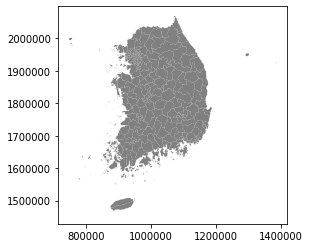

In [97]:
gdf_admin_gu.plot(color = 'grey')

In [98]:
gdf_admin_gu2 = gdf_admin_gu[(gdf_admin_gu['DO'].str.contains('11') == True) | (gdf_admin_gu['DO'].str.contains('36') == True) | (gdf_admin_gu['SIG_KOR_NM'].str.contains('수원'))]

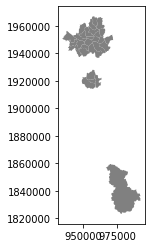

In [99]:
gdf_admin_gu2.plot(color = 'grey')